<a href="https://colab.research.google.com/github/lucamodica/introduction-to-data-science-and-ai--chalmers/blob/main/assignments/7-neural-networks/notebook_week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [ ]:
# package for advanced debugging in python in a simple way
%%capture
!pip install icecream

In [ ]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from icecream import ic

# config inline plots
%matplotlib inline
# set seaborn style
sns.set_style('darkgrid')

## Part 1

In [ ]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = np_utils.to_categorical(lbl_train, num_classes)
y_test = np_utils.to_categorical(lbl_test, num_classes)

#### 1.1 Explain the data pre-processing highlighted in the notebook

**ANSWER TO BE FIXED**

1. The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small. `x_train /= 255` and `x_test /= 255` is used to normalize the pixel value in a range $(0, 1]$ (that is the greyscale).

2. `y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)` and `y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)` is basically one hot encoding of the category target labels.

---

## Part 2

In [ ]:
## Define model ##
model = Sequential()

model.add(Flatten()) # Flatten() Flattens the input. Does not affect the batch size.
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

#### 2.1 How  many  layers  does  the  network  in  the  notebook  have?  How  many  neurons  does each layer have? What activation functions and why are these appropriate for this application? What is the total number of parameters for the network? Why do the input and output layers have the dimensions they have?

**ANSWER TO BE FIXED**

There are 4 layers in the initial neural network.

- The first input layer, with the same dimension as the number of feature we have for each datapoint. In the the MNIST dataset case, the features corresponds to the number of pixels in an image. In this case, the input layer has $28 \times 28 = 784$ neurons.
- The next 2 layers are hidden layers, with 64 neurons each. The number of neurons in these case are usally decided based on the neural network adjustment in order to improve its performace. But in general, It should be less than the the number in the input layer. In both the hidden layers the activation function used is the ReLU. ReLU is flat only for negative values, instead of also for high numbers: this feature can help making the gradient descent algorithm faster, since there will be less places where the function will be flat (thus, less places where the learning is slowed down).
- The last one is the output layers. It has 10 neurons, one for each possible number in the MNIST dataset. Since we have 10 different choices, we can also represent the output layer with just 4 neurons; the number, in that case, would be represented by its binary representation (we could use 4 neurons for numbers from 0 to 12). Since It's a multi-class classification problem, the softmax activation function is used. It's a generaliztion of the logistic function, suitable for more than 2 classes.

#### 2.2 What loss function is used to train the network? What is the functional form (a mathematical expression) of the loss function? and how should we interpret it? Why is it appropriate for the problem at hand?

The loss function used to train the neural network is the **categorical cross-entropy loss**, a weighted average of the log loss for each class. It's defined as follows:

$L(y, \hat{y}) = -\sum_{i}^C y_i \log (\frac{e^{\hat{y}_i}}{\sum_{j}^C e^{\hat{y}_j}})$

Where:

- $L(y, \hat{y})$ is the category cross-entropy loss definition.
- $C$ is the total number of predictable classes.
- $y$ is the one-hot encoded vector with the the true ground labels (only one element will be non-zero, which is the true class).
- $\hat{y}$ is the array of the predicted class probabilities by the neural network.
- $\frac{e^{\hat{y}_i}}{\sum_{j}^C e^{\hat{y}_j}}$ is the probability of the class $p$ being predicted (the softmax function).

The loss function above results appropriate in this multi-class classification task. This mainly beacuse:
- in multi-class classification task It would result a *natural way to assess the performance of the neural network, since It easly allow to compare the obtained probabilities with the true labels*;
- the loss function *outputs non-negative and continuous values, ideal for optimization algorithms such as the gradient descent* (It would produce a continuous and smooth loss surface).

#### 2.3 Train the network for 10 epochs and plot the training and validation accuracy for each epoch.

Epoch 1/10
469/469 [==============================] - 15s 9ms/step - loss: 0.4635 - accuracy: 0.8676 - val_loss: 0.2408 - val_accuracy: 0.9320
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2217 - accuracy: 0.9350 - val_loss: 0.1807 - val_accuracy: 0.9450
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1703 - accuracy: 0.9505 - val_loss: 0.1727 - val_accuracy: 0.9471
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1401 - accuracy: 0.9593 - val_loss: 0.1340 - val_accuracy: 0.9590
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1190 - accuracy: 0.9656 - val_loss: 0.1296 - val_accuracy: 0.9609
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1041 - accuracy: 0.9695 - val_loss: 0.1112 - val_accuracy: 0.9663
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0927 - accuracy: 0.9728 - val_loss: 0.1094 - val_accuracy: 0.9665
Epo

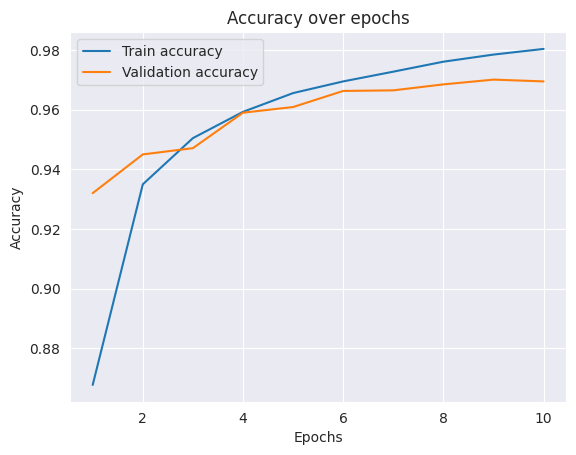

In [ ]:
fit_info = model.fit(x_train, y_train,
                     batch_size=batch_size,
                     epochs=epochs,
                     verbose=1,
                     validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

train_scores = fit_info.history['accuracy']
val_scores = fit_info.history['val_accuracy']

# Create the plot
fig, ax = plt.subplots()

sns.lineplot(x=np.arange(1, 11), y=train_scores, label='Train accuracy', ax=ax)
sns.lineplot(x=np.arange(1, 11), y=val_scores, label='Validation accuracy', ax=ax)

# Set labels and title
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy over epochs')

ax.legend()
plt.show()


As we can notice from the accuracy plot, after the 9th epoch the neural network starts to overfit. We can notice this behavior especially for the gradual slight decrease on validation accuracy.

#### 2.4 Update the model to implement a three-layer neural network where the hidden layers have 500 and 300 hidden units respectively. Train for 40 epochs. What is the best validation accuracy you can achieve? – Geoff Hinton (a co-pioneer of Deep learning) claimed this network could reach a validation accuracy of 0.9847 (http://yann.lecun.com/exdb/mnist/) using weight decay (L2 regularization of weights (kernels): https://keras.io/api/layers/regularizers/). Implement weight decay on hidden units and train and select 5 regularization factors from 0.000001 to 0.001. Train 3 replicates networks for each regularization factor. Plot the final validation accuracy with standard deviation (computed from the replicates) as a function of the regularization  factor. How close do you get to Hintons result? If you do not get the same results, what factors may influence this?

In [ ]:
def improved_nn(reg_factor=0, show_score_plot=False):
  """
  Train a neural network with two hidden layers with 500 and 300 neurons respectively. Also add L2 regularization to the weights of the hidden layers.
  The function then returns the validation accuracy of the model.
  """

  model = Sequential()

  model.add(Flatten())
  model.add(Dense(500, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=reg_factor)))
  model.add(Dense(300, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=reg_factor)))
  model.add(Dense(num_classes, activation='softmax'))


  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.1),
                metrics=['accuracy'])

  fit_info = model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=40,
                      verbose=0,
                      validation_data=(x_test, y_test))

  train_scores = fit_info.history['accuracy']
  val_scores = fit_info.history['val_accuracy']

  if show_score_plot:
    # Create the plot
    fig, ax = plt.subplots()

    sns.lineplot(x=np.arange(1, 41), y=train_scores, label='Train accuracy', ax=ax)
    sns.lineplot(x=np.arange(1, 41), y=val_scores, label='Validation accuracy', ax=ax)

    # Set labels and title
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy over epochs')

    ax.legend()
    plt.show()

  # return the validation accuracy
  return model.evaluate(x_test, y_test, verbose=0)[1]


In [ ]:
def avg_std_3nn_val_score(reg_factor):
  """
  Given a regularization factor, train 3 replicate neural networks with that regularization
  factor and return the average and standard deviation of the validation accuracy.
  """

  val_scores = ic([improved_nn(reg_factor) for i in range(3)])


  return np.mean(val_scores), np.std(val_scores)

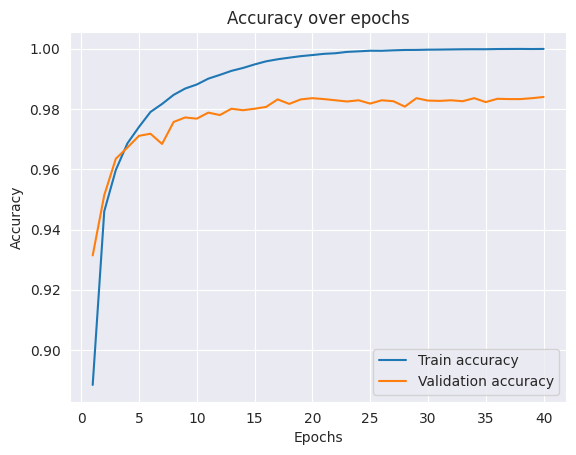

Validation accuracy of the improved neural network: 0.984000027179718


In [ ]:
print(f'Validation accuracy of the improved neural network: {improved_nn(reg_factor=1e-4, show_score_plot=True)}')

As also shown in the accuracy scores plot, the first validation score (accuracy) reached with the updated neural network architecture is $0.9822$. This using the weight decay technique, applying the L2 regularization on the weight of the hidden units (regularization factor used: $0.00001$).

To experiment even further with weight decay, we will show through a plot the same model trained with 5 different values of the regularization factor. For each of these values, the neural network will be trained 3 times, showing the mean and standard deviation the obtained values through an errorbar.

In [ ]:
weight_decay_values = np.linspace(0.000001, 0.001, 5)

results = [avg_std_3nn_val_score(reg_factor) for reg_factor in weight_decay_values]

KeyboardInterrupt: ignored

In [ ]:
results

[(0.9817333420117696, 0.00036819122875453113),
 (0.9814333319664001, 0.0003771300004754798),
 (0.9822333455085754, 0.0006018476365993662),
 (0.9709999958674113, 0.013810381055876068),
 (0.9783666729927063, 0.00315839613030982)]

In [ ]:
weight_decay_values

array([1.0000e-06, 2.5075e-04, 5.0050e-04, 7.5025e-04, 1.0000e-03])

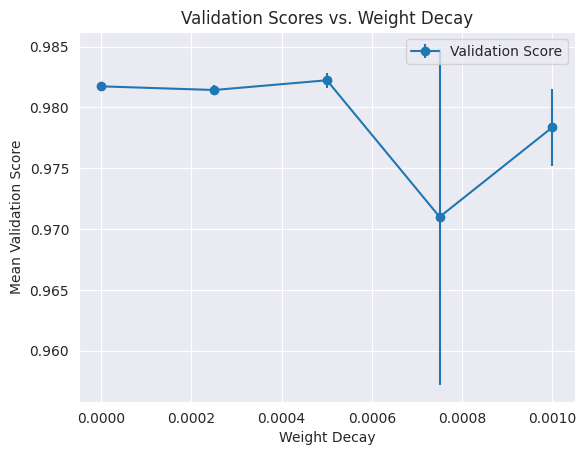

In [ ]:
means = [result[0] for result in results]
stds = [result[1] for result in results]

plt.errorbar(weight_decay_values, means, yerr=stds, marker='o', linestyle='-', label='Validation Score')
plt.xlabel('Weight Decay')
plt.ylabel('Mean Validation Score')
plt.title('Validation Scores vs. Weight Decay')
plt.legend()
plt.show()

PUT EXPLANATION ABOUT DB RESULTS HERE


## Part 3

#### Design a model that makes use of at least one convolutional layer - how performant a model can you get? -- According to the MNIST database it should be possible reach to 99% accuracy on the validation data. If you choose to use any layers apart from the convolutional layers and layers that you used in previous questions, you must describe what they do. If you do not reach 99%  accuracy, report your best performance, and explain your attempts and thought process.

As reference, the Convolutional Neural Network implemented follows the [LeNet-5 architecture](https://en.wikipedia.org/wiki/LeNet).

In [ ]:
def cnn(show_score_plot=False):
  """
  Train a convolutional neural network that try to replicate LeNet-5.
  The function then returns the validation accuracy of the model.
  """

  model = Sequential()

  # specify the amount of padding (2 pixels) for the first convolutional layer
  model.add(ZeroPadding2D(padding=(2, 2)))

  # first convolutional layer: 6 filters with 5x5 as kernel size. Inout shape
  # corresponding to the dimension of the image, plus the only channel available
  model.add(Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))

  # pool layer for the first convolutional layer: (2, 2) pool size and +2 stride
  model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

  # second convolutional layer: 16 filters with 2x2 kernel size
  model.add(Conv2D(16, (5,5), activation="relu"))

  # pool layer for the second convolutional layer
  model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

  # input flattenning
  model.add(Flatten())

  # fully connected layers
  model.add(Dense(120, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=0.0001)))
  model.add(Dense(84, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=0.0001)))

  # Dropout Layer
  model.add(Dropout(0.5))

  # output layer
  model.add(Dense(num_classes, activation='softmax'))


  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.1),
                metrics=['accuracy'])

  fit_info = model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=40,
                      verbose=1,
                      validation_data=(x_test, y_test))

  train_scores = fit_info.history['accuracy']
  val_scores = fit_info.history['val_accuracy']

  if show_score_plot:
    # Create the plot
    fig, ax = plt.subplots()

    sns.lineplot(x=np.arange(1, 41), y=train_scores, label='Train accuracy', ax=ax)
    sns.lineplot(x=np.arange(1, 41), y=val_scores, label='Validation accuracy', ax=ax)

    # Set labels and title
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy over epochs')

    ax.legend()
    plt.show()

  # return the validation accuracy
  return model.evaluate(x_test, y_test, verbose=0)[1]

Epoch 1/40
469/469 [==============================] - 3s 5ms/step - loss: 0.7277 - accuracy: 0.7722 - val_loss: 0.2098 - val_accuracy: 0.9438
Epoch 2/40
469/469 [==============================] - 2s 5ms/step - loss: 0.2235 - accuracy: 0.9437 - val_loss: 0.1231 - val_accuracy: 0.9689
Epoch 3/40
469/469 [==============================] - 3s 6ms/step - loss: 0.1651 - accuracy: 0.9623 - val_loss: 0.1014 - val_accuracy: 0.9765
Epoch 4/40
469/469 [==============================] - 2s 5ms/step - loss: 0.1359 - accuracy: 0.9697 - val_loss: 0.0993 - val_accuracy: 0.9774
Epoch 5/40
469/469 [==============================] - 2s 5ms/step - loss: 0.1181 - accuracy: 0.9748 - val_loss: 0.0899 - val_accuracy: 0.9805
Epoch 6/40
469/469 [==============================] - 2s 5ms/step - loss: 0.1101 - accuracy: 0.9773 - val_loss: 0.0755 - val_accuracy: 0.9859
Epoch 7/40
469/469 [==============================] - 2s 5ms/step - loss: 0.0996 - accuracy: 0.9802 - val_loss: 0.0765 - val_accuracy: 0.9845
Epoch 

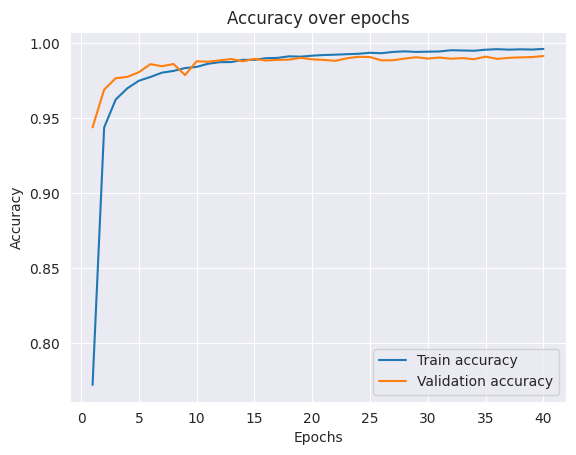

Validation accuracy of the a neural network with at least one convolutional layer: 0.9912999868392944


In [ ]:
print(f'Validation accuracy of the a neural network with at least one convolutional layer: {cnn(show_score_plot=True)}')